In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary.csv


In [2]:
salary_df= pd.read_csv("../input/salary/Salary.csv")

In [3]:
# imp lib
import pandas as pd 
import numpy as np 
# plot lib 
import matplotlib.pyplot as plt 
import seaborn as sns
#modeling lib 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import RobustScaler 
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.model_selection import train_test_split

In [4]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salary_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [6]:
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [7]:
# checking for null values in the data set 
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

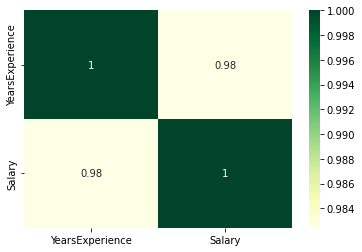

In [8]:
# to understand the relation between the varaibles 
salary_df.corr()
sns.heatmap(salary_df.corr(),cmap = 'YlGn',annot = True )

# we got correlation between them as 98% which means both the variables are highly correlated with one another. 

<AxesSubplot:xlabel='count', ylabel='YearsExperience'>

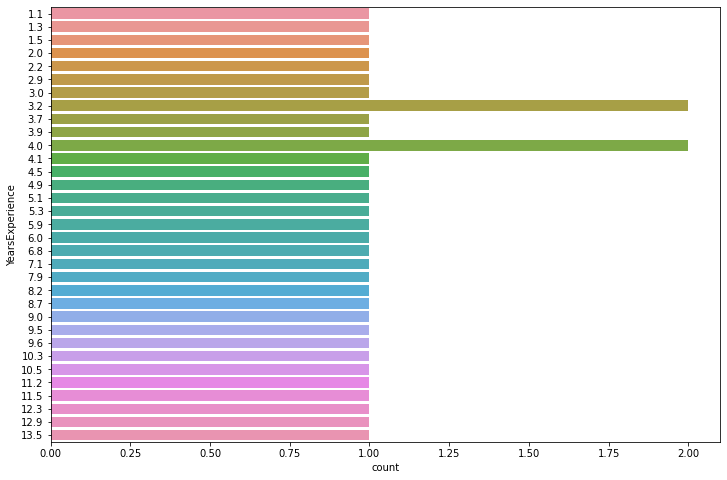

In [9]:
# we are calculating numbers of emmployes in each category
fig=plt.figure(figsize=(12,8))
sns.countplot(y='YearsExperience',data=salary_df)


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

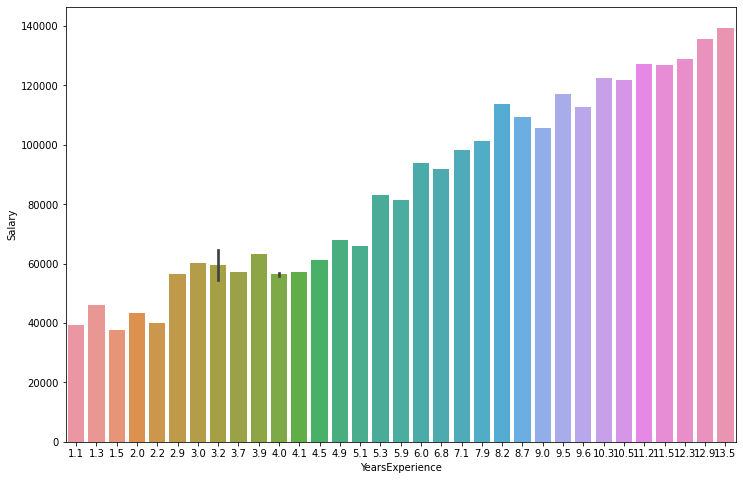

In [10]:
fig=plt.figure(figsize=(12,8))
sns.barplot(x='YearsExperience', y = 'Salary' , data = salary_df)

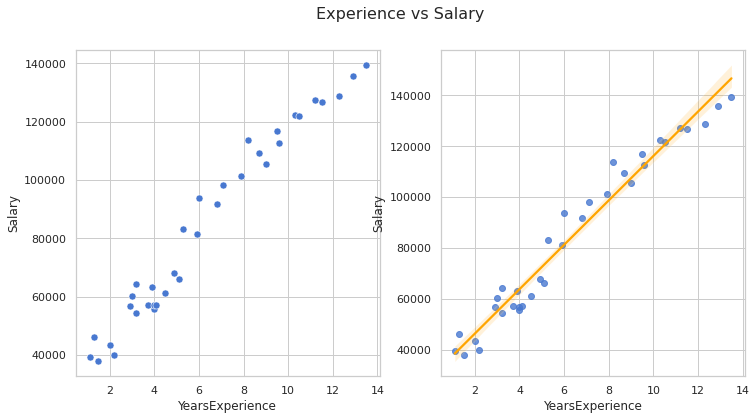

In [11]:
# data viualization 
sns.set(style = "whitegrid", palette = 'muted')
fig,axes = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(x ='YearsExperience',y ='Salary',data = salary_df, color = 'b', s = 50 , ax = axes[0])
sns.regplot(x ='YearsExperience',y ='Salary',data = salary_df, color = 'b', line_kws = {'color':'orange'}, ax = axes[1])
fig.suptitle('Experience vs Salary', fontsize = '16')
plt.show()

In [12]:
x = salary_df.iloc[:,:-1].values # hold years of exprience data 
y = salary_df.iloc[:,-1].values # holds salary data
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]


In [13]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 127345 126756 128765 135675 139465]


In [14]:
# spliting data as 80/20 80% of data to training and 20 % to testing 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .2 , random_state = 42 )
print(f"shape of Train X :{x_train.shape},y:{y_train.shape}, Test X:{x_test.shape},Y:{y_test.shape}")

shape of Train X :(28, 1),y:(28,), Test X:(7, 1),Y:(7,)


In [15]:
lr_model = LinearRegression (fit_intercept = True , normalize = True ,n_jobs = 2)
lr_model.fit(x_train,y_train)

LinearRegression(n_jobs=2, normalize=True)

In [16]:
y_preds = lr_model.predict(x_test)
print("prediction acuracy :\n R2 score = {:.2f}".format(r2_score(y_test,y_preds)))
print("mean squared error :\n MSE = {:.2f}".format(mean_squared_error(y_test,y_preds)))

prediction acuracy :
 R2 score = 0.89
mean squared error :
 MSE = 55761791.31


In [17]:
inference = pd.DataFrame ({"actual":y_test,"prediction":y_preds,"abs error ": np.abs(y_test-y_preds)})
inference

,actual,prediction,abs error
0,116969,110576.917063,6392.082937
1,57081,64251.572689,7170.572689
2,109431,103713.903082,5717.096918
3,98273,89987.875119,8285.124881
4,67938,71114.586670,3176.586670
5,121872,119155.684540,2716.315460
6,93940,80551.230895,13388.769105


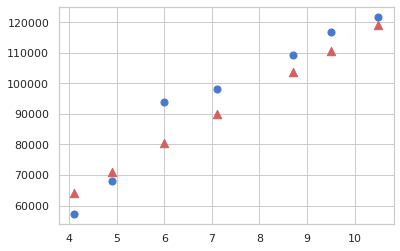

In [18]:
plt.scatter(x=x_test,y=y_test, s= 50 ,label = 'actual', color= 'b')
plt.scatter(x=x_test,y=y_preds, s = 70 , label = 'predicted', marker = '^', color = 'r')

In [19]:
from sklearn import metrics 
print('mean absolute error : ',metrics.mean_absolute_error(y_test,y_preds))
print('mean squared error : ',metrics.mean_squared_error(y_test,y_preds))
print('root mean squared error : ',np.sqrt(metrics.mean_absolute_error(y_test,y_preds)))

mean absolute error :  6692.364094497281
mean squared error :  55761791.30626011
root mean squared error :  81.80687070471087


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)

0.891423414004278

# implementing gradient decent algorithm in Linear Regression 


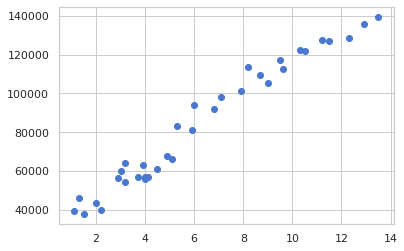

In [21]:
plt.scatter(x,y)
plt.show()

In [22]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, x, y):
        b = 0
        m = 5
        n = x.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*x + b) / n
            m_gradient = -2 * np.sum(x*(y - (m*x + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, x):
        return self.m*x + self.b

In [23]:
np.random.seed(42)
x = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

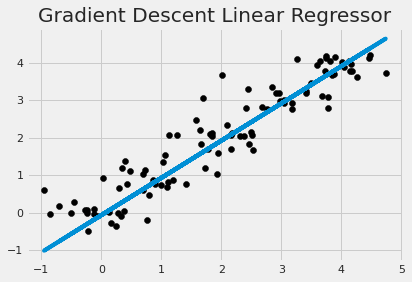

In [24]:
clf = GradientDescentLinearRegression()
clf.fit(x, y)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(x, y, color='black')
plt.plot(x, clf.predict(x))
plt.gca().set_title("Gradient Descent Linear Regressor")